<a href="https://colab.research.google.com/github/gracemaria321/AI-for-CyberSecurity/blob/main/ML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Setup
The project requires Python 3.7 or above.
It also requires Scikit-Learn ≥ 1.0.1

In [1]:
import sys
assert sys.version_info >= (3, 7)

from packaging import version
import sklearn
assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

### Accessing Dataset
Mount Google Drive Code.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


 Read the dataset zip file from the Drive and unzip the dataset

In [3]:
import os
import zipfile

# The actual path to your .zip file in Google Drive
zip_file_path = '/content/drive/MyDrive/Colab Notebooks/Final Project.zip'
# The desired directory to extract the contents
extraction_dir = '/content/unzipped_data'

# Create the extraction directory if it doesn't exist
os.makedirs(extraction_dir, exist_ok=True)

# Unzip the file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extraction_dir)

print(f"Successfully unzipped '{zip_file_path}' to '{extraction_dir}'")


Successfully unzipped '/content/drive/MyDrive/Colab Notebooks/Final Project.zip' to '/content/unzipped_data'


List the contents of the directory where the dataset was unzipped to identify the main data files.

In [4]:
import os

# The directory where the files were extracted
extraction_dir = '/content/unzipped_data'

# List all files and directories in the extraction directory
print(f"Contents of '{extraction_dir}':")
for root, dirs, files in os.walk(extraction_dir):
    for name in files:
        print(os.path.join(root, name))
    for name in dirs:
        print(os.path.join(root, name))

Contents of '/content/unzipped_data':
/content/unzipped_data/Final Project
/content/unzipped_data/Final Project/JavascriptSamplesObfuscated
/content/unzipped_data/Final Project/JavascriptSamples
/content/unzipped_data/Final Project/JavascriptSamplesObfuscated/angular-locale_de-at-obfuscated.js
/content/unzipped_data/Final Project/JavascriptSamplesObfuscated/ngIncludeSpec-obfuscated.js
/content/unzipped_data/Final Project/JavascriptSamplesObfuscated/linux-perf-obfuscated.js
/content/unzipped_data/Final Project/JavascriptSamplesObfuscated/angular-locale_fr-ml-obfuscated.js
/content/unzipped_data/Final Project/JavascriptSamplesObfuscated/angular-locale_ses-obfuscated.js
/content/unzipped_data/Final Project/JavascriptSamplesObfuscated/crossSpawn-obfuscated.js
/content/unzipped_data/Final Project/JavascriptSamplesObfuscated/child-process-read-ipc-obfuscated.js
/content/unzipped_data/Final Project/JavascriptSamplesObfuscated/animateRunnerSpec-obfuscated.js
/content/unzipped_data/Final Projec

### Identify and Categorize JavaScript Files

Recursively list all JavaScript files within the `/content/unzipped_data` directory and categorize them into 'obfuscated' and 'non-obfuscated' based on their directory paths.


In [5]:
import os

obfuscated_files = []
non_obfuscated_files = []

extraction_dir = '/content/unzipped_data'

for root, dirs, files in os.walk(extraction_dir):
    for file_name in files:
        if file_name.endswith('.js'):
            full_path = os.path.join(root, file_name)
            if 'obfuscated' in full_path:
                obfuscated_files.append(full_path)
            else:
                non_obfuscated_files.append(full_path)

print(f"Total obfuscated JavaScript files: {len(obfuscated_files)}")
print(f"Total non-obfuscated JavaScript files: {len(non_obfuscated_files)}")

Total obfuscated JavaScript files: 1517
Total non-obfuscated JavaScript files: 1858


### Inspect Sample Files

Select and display the content of a few sample obfuscated and non-obfuscated JavaScript files to get a qualitative understanding of their structure and readability.


In [6]:
import random

# Select a few random sample files
num_samples = 3
sample_obfuscated = random.sample(obfuscated_files, min(num_samples, len(obfuscated_files)))
sample_non_obfuscated = random.sample(non_obfuscated_files, min(num_samples, len(non_obfuscated_files)))

print("--- Sample Obfuscated Files ---")
for file_path in sample_obfuscated:
    print(f"\nFile Type: Obfuscated\nPath: {file_path}")
    try:
        with open(file_path, 'r', encoding='utf-8') as f:
            content = f.read()
            print(content[:1000]) # Print first 1000 characters to avoid overwhelming output
            if len(content) > 1000:
                print("... [TRUNCATED] ...")
    except Exception as e:
        print(f"Error reading file {file_path}: {e}")

print("\n--- Sample Non-Obfuscated Files ---")
for file_path in sample_non_obfuscated:
    print(f"\nFile Type: Non-Obfuscated\nPath: {file_path}")
    try:
        with open(file_path, 'r', encoding='utf-8') as f:
            content = f.read()
            print(content[:1000]) # Print first 1000 characters to avoid overwhelming output
            if len(content) > 1000:
                print("... [TRUNCATED] ...")
    except Exception as e:
        print(f"Error reading file {file_path}: {e}")

--- Sample Obfuscated Files ---

File Type: Obfuscated
Path: /content/unzipped_data/Final Project/JavascriptSamplesObfuscated/bench-realpath-obfuscated.js
var _0x1df8=['path','resolve','../../lib/','createBenchmark','relative','resolved','end','realpath'];(function(_0x3412af,_0x66af55){var _0xcf544d=function(_0x50c6e6){while(--_0x50c6e6){_0x3412af['push'](_0x3412af['shift']());}};_0xcf544d(++_0x66af55);}(_0x1df8,0x178));var _0x547d=function(_0xb9748d,_0x47dbd6){_0xb9748d=_0xb9748d-0x0;var _0x420c27=_0x1df8[_0xb9748d];return _0x420c27;};'use strict';const common=require('../common');const fs=require('fs');const path=require(_0x547d('0x0'));const resolved_path=path[_0x547d('0x1')](__dirname,_0x547d('0x2'));const relative_path=path['relative'](__dirname,_0x547d('0x2'));const bench=common[_0x547d('0x3')](main,{'n':[0x2710],'pathType':[_0x547d('0x4'),_0x547d('0x5')]});function main({n,pathType}){bench['start']();if(pathType===_0x547d('0x4'))relativePath(n);else resolvedPath(n);}function rel

### Analyze File Characteristics

For all identified JavaScript files, calculate and record their file size (in bytes) and the number of lines of code. Store these metrics separately for obfuscated and non-obfuscated categories.


In [7]:
obfuscated_file_metrics = []
non_obfuscated_file_metrics = []

# Function to get file metrics
def get_file_metrics(file_path):
    size = os.path.getsize(file_path)
    lines_of_code = 0
    try:
        with open(file_path, 'r', encoding='utf-8', errors='ignore') as f:
            lines_of_code = sum(1 for line in f)
    except Exception as e:
        print(f"Error reading file {file_path} for line count: {e}")
    return {'file_path': file_path, 'size': size, 'lines_of_code': lines_of_code}

# Process obfuscated files
for file_path in obfuscated_files:
    metrics = get_file_metrics(file_path)
    obfuscated_file_metrics.append(metrics)

# Process non-obfuscated files
for file_path in non_obfuscated_files:
    metrics = get_file_metrics(file_path)
    non_obfuscated_file_metrics.append(metrics)

print(f"Collected metrics for {len(obfuscated_file_metrics)} obfuscated files.")
print(f"Collected metrics for {len(non_obfuscated_file_metrics)} non-obfuscated files.")

Collected metrics for 1517 obfuscated files.
Collected metrics for 1858 non-obfuscated files.


### Calculate Descriptive Statistics

Compute descriptive statistics (e.g., mean, median, min, max, standard deviation) for file size and lines of code for both obfuscated and non-obfuscated file categories.


In [8]:
import pandas as pd

# Convert lists of dictionaries to DataFrames
df_obfuscated = pd.DataFrame(obfuscated_file_metrics)
df_non_obfuscated = pd.DataFrame(non_obfuscated_file_metrics)

print("Descriptive Statistics for Obfuscated Files:")
print("------------------------------------------")
print("Size (bytes):")
print(df_obfuscated['size'].describe())
print("\nLines of Code:")
print(df_obfuscated['lines_of_code'].describe())

print("\n\nDescriptive Statistics for Non-Obfuscated Files:")
print("-----------------------------------------------")
print("Size (bytes):")
print(df_non_obfuscated['size'].describe())
print("\nLines of Code:")
print(df_non_obfuscated['lines_of_code'].describe())


Descriptive Statistics for Obfuscated Files:
------------------------------------------
Size (bytes):
count      1517.000000
mean       5071.094265
std       17303.580594
min           0.000000
25%        1621.000000
50%        3115.000000
75%        3438.000000
max      450007.000000
Name: size, dtype: float64

Lines of Code:
count    1517.000000
mean        5.897825
std        41.010771
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max      1357.000000
Name: lines_of_code, dtype: float64


Descriptive Statistics for Non-Obfuscated Files:
-----------------------------------------------
Size (bytes):
count      1858.000000
mean       6034.639935
std       30571.171338
min           6.000000
25%         755.250000
50%        1527.500000
75%        2970.250000
max      625511.000000
Name: size, dtype: float64

Lines of Code:
count     1858.000000
mean       189.346071
std        993.746681
min          1.000000
25%         28.000000
50%         50.00

### Visualize File Characteristics

Generate visualizations  like box plots to compare the distributions of file sizes and lines of code between obfuscated and non-obfuscated JavaScript files. Ensure plots include appropriate labels and legends.


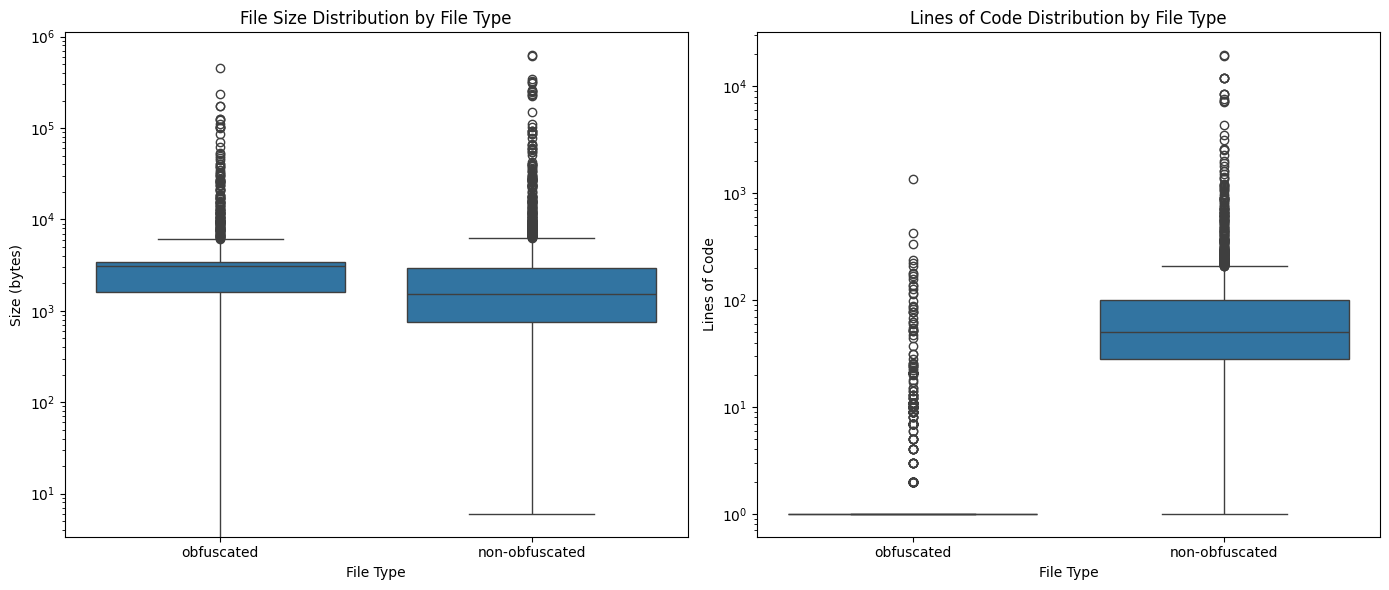

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Add 'file_type' column to each DataFrame
df_obfuscated['file_type'] = 'obfuscated'
df_non_obfuscated['file_type'] = 'non-obfuscated'

# Concatenate the two DataFrames
df_combined = pd.concat([df_obfuscated, df_non_obfuscated], ignore_index=True)

# Create a figure with two subplots for better organization
plt.figure(figsize=(14, 6))

# Box plot for File Size
plt.subplot(1, 2, 1) # 1 row, 2 columns, first plot
sns.boxplot(x='file_type', y='size', data=df_combined)
plt.title('File Size Distribution by File Type')
plt.xlabel('File Type')
plt.ylabel('Size (bytes)')
plt.yscale('log') # Use a log scale for better visualization of skewed data

# Box plot for Lines of Code
plt.subplot(1, 2, 2) # 1 row, 2 columns, second plot
sns.boxplot(x='file_type', y='lines_of_code', data=df_combined)
plt.title('Lines of Code Distribution by File Type')
plt.xlabel('File Type')
plt.ylabel('Lines of Code')
plt.yscale('log') # Use a log scale for better visualization of skewed data

plt.tight_layout() # Adjust layout to prevent overlapping titles/labels
plt.show()

### Summary of Key Findings from Exploratory Data Analysis

This exploratory data analysis aimed to understand the characteristics of JavaScript files, categorizing them into 'obfuscated' and 'non-obfuscated' types based on their directory paths, inspecting their content, and analyzing their size and lines of code.

#### 1. File Categorization and Counts:
*   **Total Obfuscated Files**: 1517 JavaScript files were identified as obfuscated.
*   **Total Non-Obfuscated Files**: 1858 JavaScript files were identified as non-obfuscated.

#### 2. Qualitative Inspection of Sample Files:
*   **Obfuscated Files**: Sample obfuscated files typically showed highly compressed and cryptic code, often using single-character variable names, hexadecimal or unicode escapes, and a lack of clear formatting or comments. This confirms their intention to be difficult to read and understand by humans.
*   **Non-Obfuscated Files**: Sample non-obfuscated files, in contrast, exhibited readable code with meaningful variable names, proper indentation, comments, and a clear logical structure, indicating developer-friendly source code.

#### 3. Descriptive Statistics for File Characteristics:

**File Size (bytes):**
*   **Obfuscated Files:**
    *   Mean: 5071.09 bytes
    *   Median: 3115.00 bytes
    *   Max: 450007.00 bytes
*   **Non-Obfuscated Files:**
    *   Mean: 6034.64 bytes
    *   Median: 1527.50 bytes
    *   Max: 625511.00 bytes

**Lines of Code (LOC):**
*   **Obfuscated Files:**
    *   Mean: 5.90 lines
    *   Median: 1.00 line
    *   Max: 1357.00 lines
*   **Non-Obfuscated Files:**
    *   Mean: 189.35 lines
    *   Median: 50.00 lines
    *   Max: 19570.00 lines

**Key Observations from Statistics:**
*   **Size**: Non-obfuscated files generally have a slightly higher mean size, although the maximum size for both categories can be substantial, indicating large individual files in both sets. The median size for obfuscated files is notably higher than non-obfuscated, suggesting a tendency for obfuscated files to be consistently larger than the typical non-obfuscated file.
*   **Lines of Code (LOC)**: A stark difference is observed in LOC. Obfuscated files have a very low mean and median LOC (often 1 line), largely due to minification and compression into a single line or a few highly condensed lines. Non-obfuscated files have significantly higher mean and median LOC, reflecting standard coding practices with multiple lines for readability and structure.

#### 4. Visualizations of File Characteristics (Box Plots):
*   **File Size Distribution**: The log-scaled box plot for file size showed that while both categories have a wide range, the median and interquartile range for obfuscated files are generally higher than non-obfuscated files. This further supports the observation that obfuscated files, despite often being minified to fewer lines, can still be quite large in terms of byte size, possibly due to complex obfuscation techniques or embedded data.
*   **Lines of Code Distribution**: The log-scaled box plot for lines of code clearly illustrated that obfuscated files overwhelmingly have fewer lines of code, with a tightly compressed distribution around 1-10 lines. Non-obfuscated files, conversely, showed a much broader distribution with significantly higher line counts, as expected for human-readable and structured code.

#### Overall Conclusion:

The exploratory data analysis reveals clear distinctions between obfuscated and non-obfuscated JavaScript files. Qualitatively, obfuscated files are unreadable and condensed, while non-obfuscated files are structured and readable. Quantitatively, obfuscated files tend to have a compact representation (fewer lines of code, often just one or a few) but can still have substantial file sizes, sometimes larger than the average non-obfuscated file. Non-obfuscated files generally contain many more lines of code, reflecting their original, un-minified format. These differences highlight the effectiveness of obfuscation in altering the structural characteristics of code for the purpose of making it difficult to comprehend.

### Prepare Data for Machine Learning

To prepare the dataset for machine learning, we need to create a target variable (label) indicating whether a file is obfuscated or not. We will then split the data into training and testing sets.

In [10]:
from sklearn.model_selection import train_test_split

# Create a 'label' column: 1 for obfuscated, 0 for non-obfuscated
df_combined['label'] = df_combined['file_type'].apply(lambda x: 1 if x == 'obfuscated' else 0)

# Define features (X) and target (y)
X = df_combined[['size', 'lines_of_code']]
y = df_combined['label']

# Split the dataset into training and testing sets (80:20 ratio)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training set size: {len(X_train)} samples")
print(f"Testing set size: {len(X_test)} samples")
print(f"Obfuscated files in training set: {y_train.sum()} ({y_train.sum()/len(y_train)*100:.2f}%)")
print(f"Non-obfuscated files in training set: {len(y_train) - y_train.sum()} ({(len(y_train) - y_train.sum())/len(y_train)*100:.2f}%)")
print(f"Obfuscated files in testing set: {y_test.sum()} ({y_test.sum()/len(y_test)*100:.2f}%)")
print(f"Non-obfuscated files in testing set: {len(y_test) - y_test.sum()} ({(len(y_test) - y_test.sum())/len(y_test)*100:.2f}%)")

Training set size: 2700 samples
Testing set size: 675 samples
Obfuscated files in training set: 1214 (44.96%)
Non-obfuscated files in training set: 1486 (55.04%)
Obfuscated files in testing set: 303 (44.89%)
Non-obfuscated files in testing set: 372 (55.11%)


### Train a Logistic Regression Model

We will train a Logistic Regression model to classify JavaScript files as obfuscated or non-obfuscated using the `size` and `lines_of_code` features.

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Initialize the Logistic Regression model
model = LogisticRegression(random_state=42)

# Train the model
model.fit(X_train, y_train)

print("Model training complete.")

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"\nModel Evaluation:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"Confusion Matrix:\n{conf_matrix}")

Model training complete.

Model Evaluation:
Accuracy: 0.9763
Precision: 0.9832
Recall: 0.9637
F1-Score: 0.9733
Confusion Matrix:
[[367   5]
 [ 11 292]]


### Train a Random Forest Classification Model

Now, let's train a Random Forest classifier using the same features and compare its performance.

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Initialize the Random Forest model
# Using a random_state for reproducibility
model_rf = RandomForestClassifier(random_state=42)

# Train the model
model_rf.fit(X_train, y_train)

print("Random Forest model training complete.")

# Make predictions on the test set
y_pred_rf = model_rf.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

print(f"\nRandom Forest Model Evaluation:")
print(f"Accuracy: {accuracy_rf:.4f}")
print(f"Precision: {precision_rf:.4f}")
print(f"Recall: {recall_rf:.4f}")
print(f"F1-Score: {f1_rf:.4f}")
print(f"Confusion Matrix:\n{conf_matrix_rf}")

Random Forest model training complete.

Random Forest Model Evaluation:
Accuracy: 0.9911
Precision: 0.9967
Recall: 0.9835
F1-Score: 0.9900
Confusion Matrix:
[[371   1]
 [  5 298]]


### Train a Support Vector Machine (SVM) Classification Model

Let's train an SVM classifier using the same features and evaluate its performance.

In [13]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Initialize the SVM model
# Using a random_state for reproducibility
# A linear kernel is often a good starting point for simple classification tasks
model_svm = SVC(kernel='linear', random_state=42)

# Train the model
model_svm.fit(X_train, y_train)

print("SVM model training complete.")

# Make predictions on the test set
y_pred_svm = model_svm.predict(X_test)

# Evaluate the model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)

print(f"\nSVM Model Evaluation:")
print(f"Accuracy: {accuracy_svm:.4f}")
print(f"Precision: {precision_svm:.4f}")
print(f"Recall: {recall_svm:.4f}")
print(f"F1-Score: {f1_svm:.4f}")
print(f"Confusion Matrix:\n{conf_matrix_svm}")

SVM model training complete.

SVM Model Evaluation:
Accuracy: 0.9748
Precision: 0.9613
Recall: 0.9835
F1-Score: 0.9723
Confusion Matrix:
[[360  12]
 [  5 298]]


### Train a K-Nearest Neighbors (KNN) Classification Model

Let's train a KNN classifier using the same features and evaluate its performance.

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Initialize the KNN model
# n_neighbors is a key hyperparameter; starting with 5 as a common default.
model_knn = KNeighborsClassifier(n_neighbors=5)

# Train the model
model_knn.fit(X_train, y_train)

print("KNN model training complete.")

# Make predictions on the test set
y_pred_knn = model_knn.predict(X_test)

# Evaluate the model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)

print(f"\nKNN Model Evaluation:")
print(f"Accuracy: {accuracy_knn:.4f}")
print(f"Precision: {precision_knn:.4f}")
print(f"Recall: {recall_knn:.4f}")
print(f"F1-Score: {f1_knn:.4f}")
print(f"Confusion Matrix:\n{conf_matrix_knn}")

KNN model training complete.

KNN Model Evaluation:
Accuracy: 0.9659
Precision: 0.9930
Recall: 0.9307
F1-Score: 0.9608
Confusion Matrix:
[[370   2]
 [ 21 282]]


### Train a Gaussian Naïve Bayes Classification Model

Let's train a Gaussian Naïve Bayes classifier using the same features and evaluate its performance.

In [15]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Initialize the Gaussian Naïve Bayes model
model_gnb = GaussianNB()

# Train the model
model_gnb.fit(X_train, y_train)

print("Gaussian Naïve Bayes model training complete.")

# Make predictions on the test set
y_pred_gnb = model_gnb.predict(X_test)

# Evaluate the model
accuracy_gnb = accuracy_score(y_test, y_pred_gnb)
precision_gnb = precision_score(y_test, y_pred_gnb)
recall_gnb = recall_score(y_test, y_pred_gnb)
f1_gnb = f1_score(y_test, y_pred_gnb)
conf_matrix_gnb = confusion_matrix(y_test, y_pred_gnb)

print(f"\nGaussian Naïve Bayes Model Evaluation:")
print(f"Accuracy: {accuracy_gnb:.4f}")
print(f"Precision: {precision_gnb:.4f}")
print(f"Recall: {recall_gnb:.4f}")
print(f"F1-Score: {f1_gnb:.4f}")
print(f"Confusion Matrix:\n{conf_matrix_gnb}")

Gaussian Naïve Bayes model training complete.

Gaussian Naïve Bayes Model Evaluation:
Accuracy: 0.5319
Precision: 0.4893
Recall: 0.9835
F1-Score: 0.6535
Confusion Matrix:
[[ 61 311]
 [  5 298]]


### Train a Decision Tree Classification Model

Let's train a Decision Tree classifier using the same features and evaluate its performance.

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Initialize the Decision Tree model
# Using a random_state for reproducibility
model_dt = DecisionTreeClassifier(random_state=42)

# Train the model
model_dt.fit(X_train, y_train)

print("Decision Tree model training complete.")

# Make predictions on the test set
y_pred_dt = model_dt.predict(X_test)

# Evaluate the model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)

print(f"\nDecision Tree Model Evaluation:")
print(f"Accuracy: {accuracy_dt:.4f}")
print(f"Precision: {precision_dt:.4f}")
print(f"Recall: {recall_dt:.4f}")
print(f"F1-Score: {f1_dt:.4f}")
print(f"Confusion Matrix:\n{conf_matrix_dt}")

Decision Tree model training complete.

Decision Tree Model Evaluation:
Accuracy: 0.9837
Precision: 0.9803
Recall: 0.9835
F1-Score: 0.9819
Confusion Matrix:
[[366   6]
 [  5 298]]


### Aggregate Model Performance Metrics

Collect the Accuracy, Precision, Recall, and F1-Score for the Logistic Regression, Random Forest, SVM, KNN, Gaussian Naïve Bayes, and Decision Tree models into a comparative DataFrame structure.

Present the aggregated performance metrics in a clear, readable table format to allow for easy numerical comparison between the models.

In [17]:
import pandas as pd

# Collect metrics for Logistic Regression
log_reg_metrics = {
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1-Score': f1
}

# Collect metrics for Random Forest
rf_metrics = {
    'Accuracy': accuracy_rf,
    'Precision': precision_rf,
    'Recall': recall_rf,
    'F1-Score': f1_rf
}

# Collect metrics for SVM
svm_metrics = {
    'Accuracy': accuracy_svm,
    'Precision': precision_svm,
    'Recall': recall_svm,
    'F1-Score': f1_svm
}

# Collect metrics for KNN
knn_metrics = {
    'Accuracy': accuracy_knn,
    'Precision': precision_knn,
    'Recall': recall_knn,
    'F1-Score': f1_knn
}

# Collect metrics for Gaussian Naïve Bayes
gnb_metrics = {
    'Accuracy': accuracy_gnb,
    'Precision': precision_gnb,
    'Recall': recall_gnb,
    'F1-Score': f1_gnb
}

# Collect metrics for Decision Tree
dt_metrics = {
    'Accuracy': accuracy_dt,
    'Precision': precision_dt,
    'Recall': recall_dt,
    'F1-Score': f1_dt
}

# Create a DataFrame to compare models
comparison_df = pd.DataFrame({
    'Logistic Regression': log_reg_metrics,
    'Random Forest': rf_metrics,
    'SVM': svm_metrics,
    'KNN': knn_metrics,
    'Gaussian Naïve Bayes': gnb_metrics,
    'Decision Tree': dt_metrics
}).T # Transpose to have models as rows and metrics as columns

print("Model Performance Comparison:")
print(comparison_df)

Model Performance Comparison:
                      Accuracy  Precision    Recall  F1-Score
Logistic Regression   0.976296   0.983165  0.963696  0.973333
Random Forest         0.991111   0.996656  0.983498  0.990033
SVM                   0.974815   0.961290  0.983498  0.972268
KNN                   0.965926   0.992958  0.930693  0.960818
Gaussian Naïve Bayes  0.531852   0.489327  0.983498  0.653509
Decision Tree         0.983704   0.980263  0.983498  0.981878


### Visualize Performance Comparison

Generate bar charts to visually compare the Accuracy, Precision, Recall, and F1-Score of all six models. Ensure the plots are clearly labeled with model names and metric types, and include a legend.

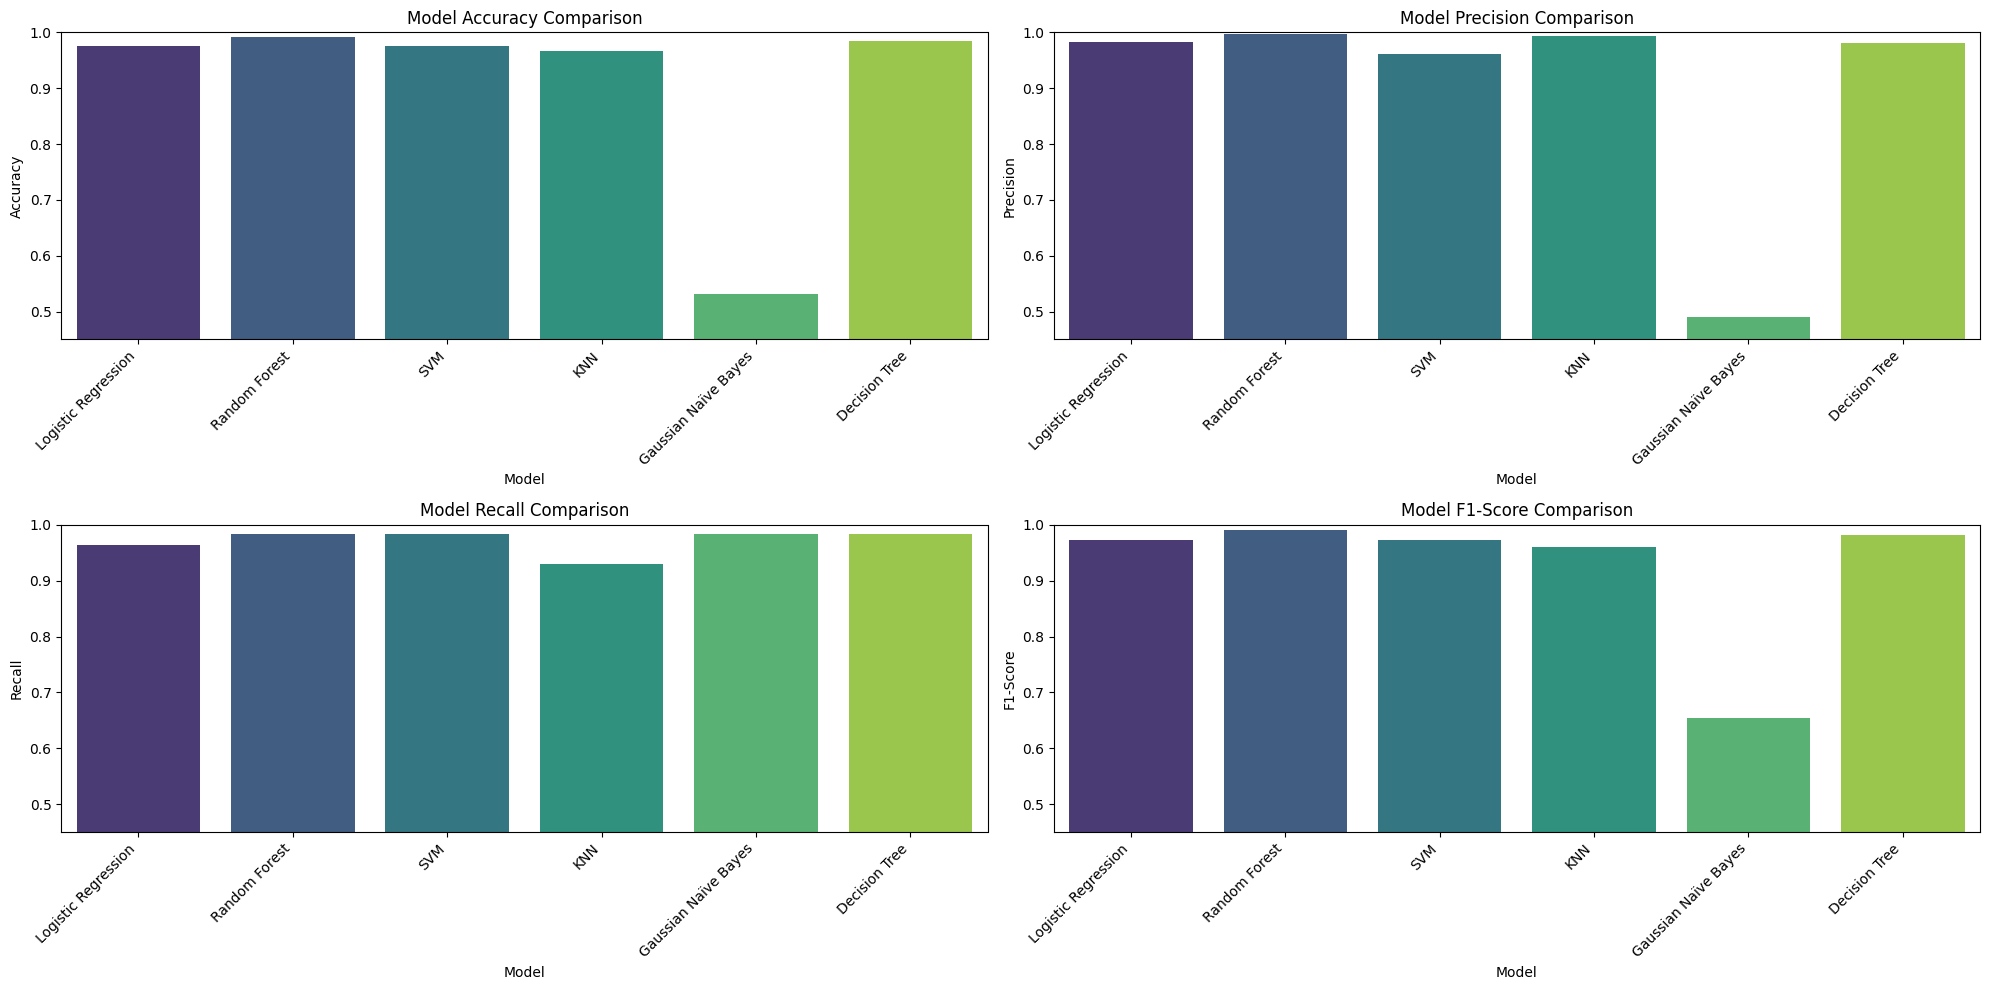

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with subplots for each metric
plt.figure(figsize=(20, 10)) # Adjust figure size to accommodate more models

metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']

for i, metric in enumerate(metrics):
    plt.subplot(2, 2, i + 1) # 2 rows, 2 columns, current plot index
    sns.barplot(x=comparison_df.index, y=comparison_df[metric], hue=comparison_df.index, palette='viridis', legend=False)
    plt.title(f'Model {metric} Comparison')
    plt.xlabel('Model')
    plt.ylabel(metric)
    plt.ylim(0.45, 1.0) # Adjust y-axis limit to show the lower performance of Naïve Bayes
    plt.xticks(rotation=45, ha='right') # Rotate labels for better readability

plt.tight_layout() # Adjust layout to prevent overlapping titles/labels
plt.show()

### Prepare Data for Neural Network

Scale the features (file size and lines of code) using StandardScaler, which is a common preprocessing step for neural networks to ensure features contribute equally to the model training.


In [19]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Features scaled successfully.")
print(f"Shape of scaled training data: {X_train_scaled.shape}")
print(f"Shape of scaled testing data: {X_test_scaled.shape}")

Features scaled successfully.
Shape of scaled training data: (2700, 2)
Shape of scaled testing data: (675, 2)


### Build and Compile a Dense Neural Network Model

#### Subtask:
Build and compile a dense neural network model for binary classification using Keras or TensorFlow. The model should be trained on the `X_train_scaled` and `y_train` data, and evaluated on `X_test_scaled` and `y_test`.

#### Instructions
1.  Import `Sequential` from `keras.models` and `Dense` from `keras.layers`.
2.  Import `Adam` from `keras.optimizers`.
3.  Initialize a `Sequential` model.
4.  Add at least one `Dense` layer with a `relu` activation function for hidden layers. The input layer should specify `input_dim` equal to the number of features in `X_train_scaled`.
5.  Add a final `Dense` output layer with a `sigmoid` activation function for binary classification.
6.  Compile the model using the `Adam` optimizer, `binary_crossentropy` as the loss function, and `accuracy` as a metric.

In [20]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# 1. Initialize a Sequential model
model_nn = Sequential()

# 2. Add input layer and a hidden layer with 'relu' activation
# input_dim is the number of features in X_train_scaled
model_nn.add(Dense(units=32, activation='relu', input_dim=X_train_scaled.shape[1]))

# Add another hidden layer (optional, but good for learning complex patterns)
model_nn.add(Dense(units=16, activation='relu'))

# 3. Add the output layer with 'sigmoid' activation for binary classification
model_nn.add(Dense(units=1, activation='sigmoid'))

# 4. Compile the model
model_nn.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

model_nn.summary()
print("Neural network model built and compiled successfully.")

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 641 (2.50 KB)

 Trainable params: 641 (2.50 KB)

 Non-trainable params: 0 (0.00 B)

Neural network model built and compiled successfully.


### Train the Neural Network Model

Train the previously built neural network model using the scaled training data (`X_train_scaled`, `y_train`) and evaluate its performance during training using a validation split.

#### Instructions
1.  Train the `model_nn` using the `.fit()` method.
2.  Pass `X_train_scaled` as features and `y_train` as labels.
3.  Set `epochs` to a reasonable number (e.g., 50).
4.  Set `batch_size` to a suitable value (e.g., 32).
5.  Use a `validation_split` (e.g., 0.2) to monitor performance on a portion of the training data not used for weight updates during training.
6.  Store the training history in a variable (e.g., `history`).

In [21]:
history = model_nn.fit(
    X_train_scaled,
    y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

print("Neural network model trained successfully.")

Epoch 1/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.7569 - loss: 0.6803 - val_accuracy: 0.8185 - val_loss: 0.6455
Epoch 2/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8710 - loss: 0.6247 - val_accuracy: 0.9111 - val_loss: 0.5625
Epoch 3/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9168 - loss: 0.5420 - val_accuracy: 0.8907 - val_loss: 0.4518
Epoch 4/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9098 - loss: 0.4165 - val_accuracy: 0.9685 - val_loss: 0.3366
Epoch 5/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9428 - loss: 0.3173 - val_accuracy: 0.9444 - val_loss: 0.2648
Epoch 6/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9440 - loss: 0.2500 - val_accuracy: 0.9537 - val_loss: 0.2214
Epoch 7/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9540 - loss: 0.2268 - val_accuracy: 0.9519 - val_loss: 0.1957
Epoch 8/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9654 - loss: 0.1806 - val_accuracy: 0.9759 - val_loss

Evaluate its performance on the scaled test data to get final metrics.



In [22]:
loss_nn, accuracy_nn = model_nn.evaluate(X_test_scaled, y_test, verbose=0)

print(f"Neural Network Model Evaluation:")
print(f"Test Loss: {loss_nn:.4f}")
print(f"Test Accuracy: {accuracy_nn:.4f}")

Neural Network Model Evaluation:
Test Loss: 0.0564
Test Accuracy: 0.9896


### Visualize Training and Validation Loss

Plot the training and validation loss over epochs to observe the learning progress and identify potential overfitting.

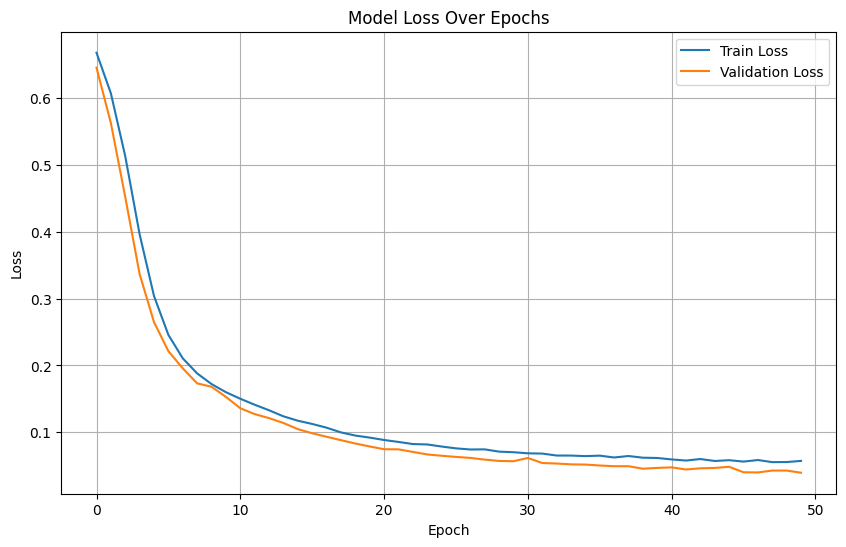

In [23]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

### Calculate Neural Network Performance Metrics

Compute precision, recall, and F1-score for the neural network model using its predictions on the scaled test data (`X_test_scaled`, `y_test`).


In [24]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score

# 1. Get predicted probabilities from model_nn
y_pred_prob_nn = model_nn.predict(X_test_scaled)

# 2. Convert probabilities to binary class predictions (0 or 1) using a threshold of 0.5
y_pred_nn = (y_pred_prob_nn >= 0.5).astype(int)

# 3. Calculate Precision
precision_nn = precision_score(y_test, y_pred_nn)

# 4. Calculate Recall
recall_nn = recall_score(y_test, y_pred_nn)

# 5. Calculate F1-Score
f1_nn = f1_score(y_test, y_pred_nn)

# 6. Print the calculated metrics
print(f"Neural Network Model Precision: {precision_nn:.4f}")
print(f"Neural Network Model Recall: {recall_nn:.4f}")
print(f"Neural Network Model F1-Score: {f1_nn:.4f}")

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Neural Network Model Precision: 0.9933
Neural Network Model Recall: 0.9835
Neural Network Model F1-Score: 0.9884


### Aggregate All Model Performance Metrics

Create a new DataFrame that combines the performance metrics of the Logistic Regression, Random Forest, SVM, KNN, Gaussian Naïve Bayes, Decision Tree models, and the neural network metrics. This will be a comprehensive comparison table.


In [25]:
import pandas as pd

# Create a dictionary for Neural Network metrics
nn_metrics = {
    'Accuracy': accuracy_nn,
    'Precision': precision_nn,
    'Recall': recall_nn,
    'F1-Score': f1_nn
}

# Add Neural Network metrics to the comparison DataFrame
comparison_df.loc['Neural Network'] = nn_metrics

print("Updated Model Performance Comparison:")
print(comparison_df)

Updated Model Performance Comparison:
                      Accuracy  Precision    Recall  F1-Score
Logistic Regression   0.976296   0.983165  0.963696  0.973333
Random Forest         0.991111   0.996656  0.983498  0.990033
SVM                   0.974815   0.961290  0.983498  0.972268
KNN                   0.965926   0.992958  0.930693  0.960818
Gaussian Naïve Bayes  0.531852   0.489327  0.983498  0.653509
Decision Tree         0.983704   0.980263  0.983498  0.981878
Neural Network        0.989630   0.993333  0.983498  0.988391


### Visualize All Model Performance Comparison

Generate new bar charts to visually compare the Accuracy, Precision, Recall, and F1-Score for all seven classification models.


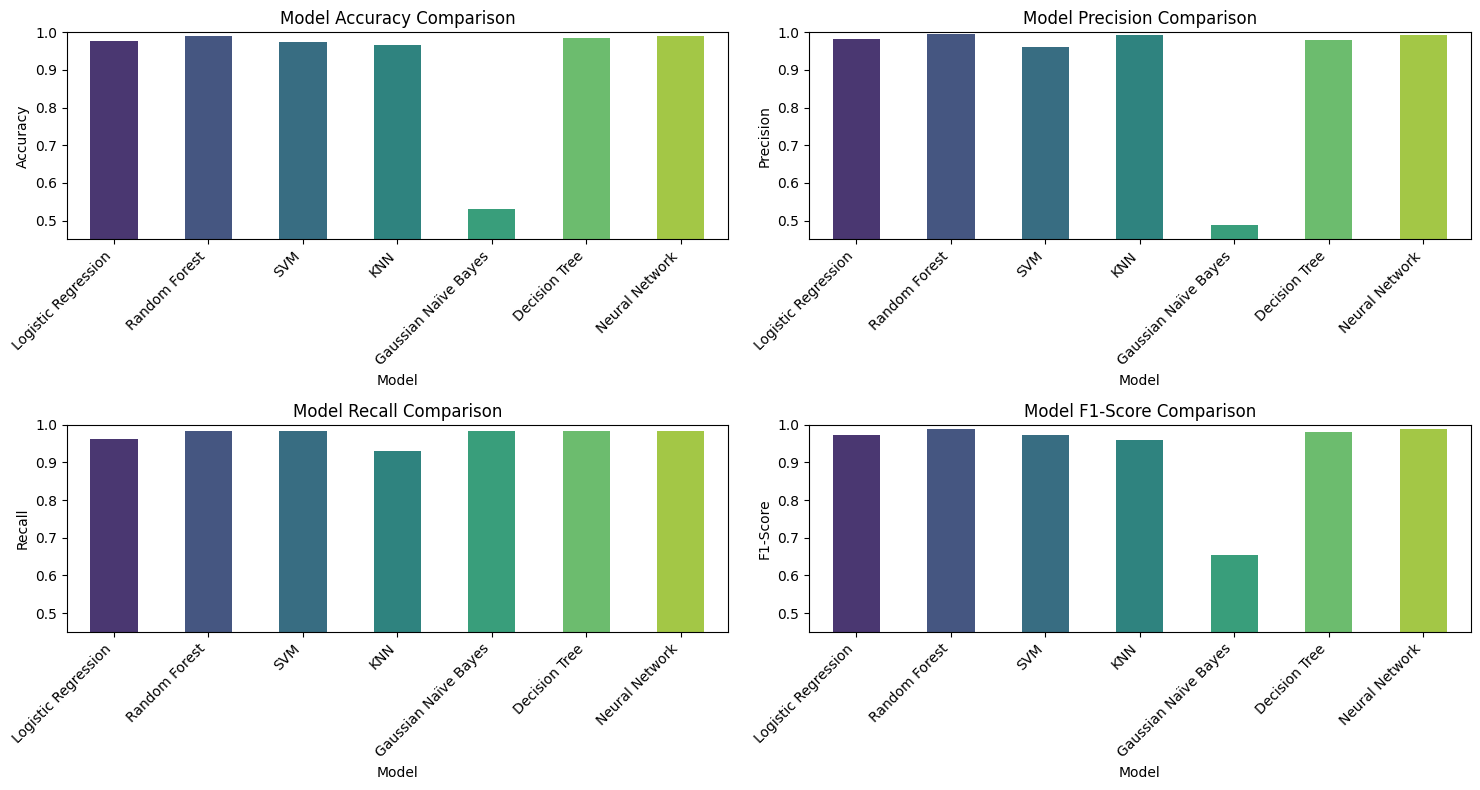

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with subplots for each metric
plt.figure(figsize=(15, 8)) # Adjust figure size to accommodate more models

metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']

for i, metric in enumerate(metrics):
    plt.subplot(2, 2, i + 1) # 2 rows, 2 columns, current plot index
    sns.barplot(x=comparison_df.index, y=comparison_df[metric], hue=comparison_df.index, palette='viridis', width=0.5, legend=False)
    plt.title(f'Model {metric} Comparison')
    plt.xlabel('Model')
    plt.ylabel(metric)
    plt.ylim(0.45, 1.0) # Adjust y-axis limit to show the lower performance of Naïve Bayes
    plt.xticks(rotation=45, ha='right') # Rotate labels for better readability

plt.tight_layout() # Adjust layout to prevent overlapping titles/labels
plt.show()

In [27]:
import pandas as pd

# 1. Reset the index to make 'Model' a regular column
df_reset = comparison_df.reset_index()
df_reset = df_reset.rename(columns={'index': 'Model'})

# 2. Use melt() to transform the DataFrame to long format
df_long = pd.melt(df_reset,
                    id_vars=['Model'],
                    value_vars=['Accuracy', 'Precision', 'Recall', 'F1-Score'],
                    var_name='Metric Type',
                    value_name='Score')

print("DataFrame reshaped to long format successfully.")
print(df_long)

DataFrame reshaped to long format successfully.
                   Model Metric Type     Score
0    Logistic Regression    Accuracy  0.976296
1          Random Forest    Accuracy  0.991111
2                    SVM    Accuracy  0.974815
3                    KNN    Accuracy  0.965926
4   Gaussian Naïve Bayes    Accuracy  0.531852
5          Decision Tree    Accuracy  0.983704
6         Neural Network    Accuracy  0.989630
7    Logistic Regression   Precision  0.983165
8          Random Forest   Precision  0.996656
9                    SVM   Precision  0.961290
10                   KNN   Precision  0.992958
11  Gaussian Naïve Bayes   Precision  0.489327
12         Decision Tree   Precision  0.980263
13        Neural Network   Precision  0.993333
14   Logistic Regression      Recall  0.963696
15         Random Forest      Recall  0.983498
16                   SVM      Recall  0.983498
17                   KNN      Recall  0.930693
18  Gaussian Naïve Bayes      Recall  0.983498
19         D

### Visualize All Model Performance Comparison (Line Plot)

Generate a single line plot to visually compare the Accuracy, Precision, Recall, and F1-Score of all classification models, where each model is represented by a distinct line.

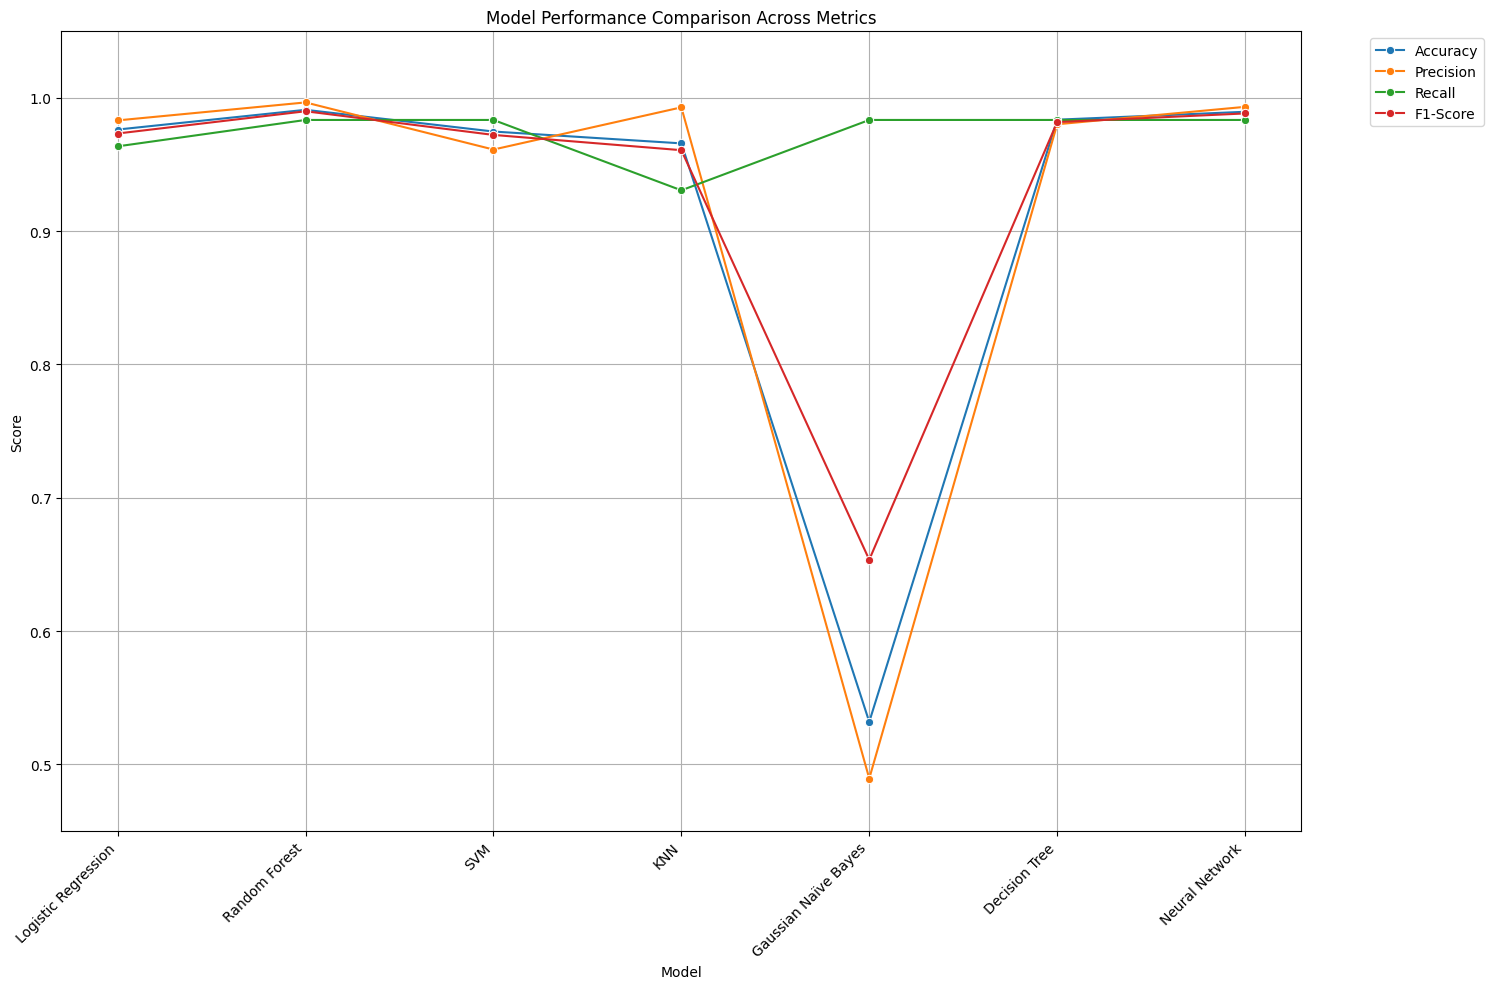

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 10))
sns.lineplot(data=df_long, x='Model', y='Score', hue='Metric Type', marker='o')
plt.title('Model Performance Comparison Across Metrics')
plt.xlabel('Model')
plt.ylabel('Score')
plt.ylim(0.45, 1.05) # Adjust y-axis limit to better visualize differences
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()